dict_keys(['LE_Hal_edge_state_750_1500_k_site_82.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large', 'LE_Hal_edge_state_750_1500_k_site_85.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large', 'LE_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])
dict_keys(['b11_

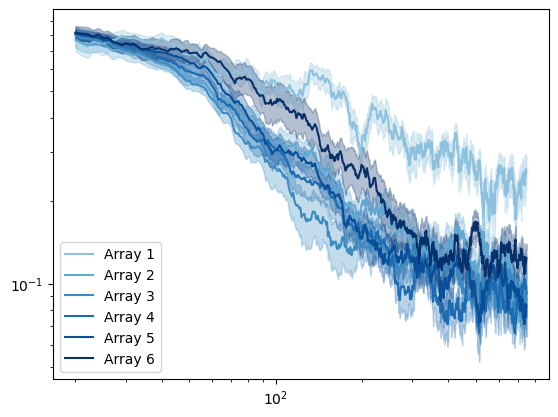

[array([1.        , 0.97167089, 0.94815886, 0.91186894, 0.89632735,
       0.89884734, 0.89674617, 0.86348847, 0.83585781, 0.82682547,
       0.79456523, 0.80655576, 0.7665132 , 0.75435453, 0.76436986,
       0.74279562, 0.73163825, 0.75204694, 0.75456707, 0.75865431,
       0.76671292, 0.74547941, 0.72511554, 0.75299155, 0.74846328,
       0.7411216 , 0.75019778, 0.764003  , 0.77329123, 0.79331121,
       0.7830245 , 0.77833251, 0.77975138, 0.77348866, 0.76380549,
       0.75183594, 0.74874467, 0.7470425 , 0.75263303, 0.76505818,
       0.77689825, 0.75880304, 0.75300867, 0.73925837, 0.73910893,
       0.7179104 , 0.73214268, 0.69392112, 0.68104977, 0.68000926,
       0.67197624, 0.69229067, 0.67251669, 0.67343192, 0.68594657,
       0.63666779, 0.65436086, 0.66034309, 0.6315044 , 0.6150253 ,
       0.60197135, 0.57731242, 0.57742024, 0.57034762, 0.58367854,
       0.60377419, 0.59823039, 0.58650059, 0.5706215 , 0.57883903,
       0.58640724, 0.57949232, 0.58958457, 0.59314098, 0.5911

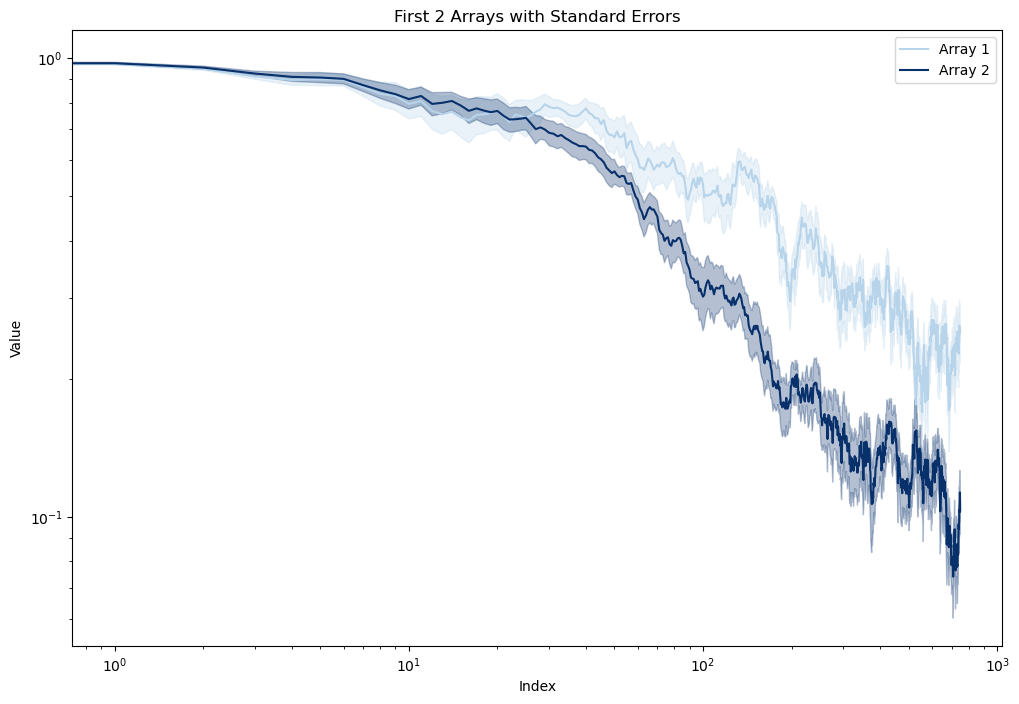

In [177]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

ky_indices = list(range(82, 100, 3))
ky_list = np.linspace(-np.pi, np.pi, 100)
ky_values = [ky_list[idx] for idx in ky_indices]

ky_indices = list(range(82, 100, 3)) + [99]
ky_list = np.linspace(-np.pi, np.pi, 100)
ky_values = [ky_list[idx] for idx in ky_indices]
# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_eigenfunc')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
for idx, site in enumerate(range(82, 100, 3), start=1):
    # Walk through the directory
    for root, dirs, files in os.walk(downloads_folder):
        # Filter out only the .txt files that match the pattern
        txt_files = [file for file in files if file.startswith(f'LE_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

        # Load each file and store it in the dictionary
        for txt_file in txt_files:
            file_path = os.path.join(root, txt_file)
            data = np.loadtxt(file_path)
            le_ana_arrays[txt_file] = data

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Initialize a dictionary to store the arrays from each directory
    le_ana_arrays = {}

    # Loop through directories b0 to b95
    for i in range(96):
        dir_path = os.path.join(downloads_folder, f'b{i}')
        le_ana_large_path = os.path.join(dir_path, f'LE_Hal_edge_state_750_1500_k_site_{site}.txt')
        
        if os.path.exists(le_ana_large_path):
            le_ana_large = np.loadtxt(le_ana_large_path)
            le_ana_arrays[f'b{i}_large'] = le_ana_large

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Convert the dictionary values to a numpy array for easier manipulation
    plot_data = np.array(list(le_ana_arrays.values()))

    # Calculate the average and standard error
    globals()[f'array{idx}'] = np.mean(plot_data, axis=0)
    globals()[f'standard_error{idx}'] = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

    # Plot the arrays using the blue color schemes
    colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
    plt.loglog(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:], label=f'Array {idx}', color=colors[idx % len(colors)])
    plt.fill_between(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:] - globals()[f'standard_error{idx}'][20:], globals()[f'array{idx}'][20:] + globals()[f'standard_error{idx}'][20:], alpha=0.3, color=colors[idx % len(colors)])

plt.legend()
plt.show()

# Define the arrays and their standard errors
arrays = [array1, array2]
standard_errors = [standard_error1, standard_error2]
print(arrays)
labels = [f'Array {i+1}' for i in range(len(arrays))]
print(labels)

# Plot the arrays with their standard errors
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
print(colors)

for i, (array, std_err, label) in enumerate(zip(arrays, standard_errors, labels)):
    plt.loglog(np.arange(len(array)), array, label=label, color=colors[i])
    plt.fill_between(np.arange(len(array)), array - std_err, array + std_err, alpha=0.3, color=colors[i])

plt.title('First 2 Arrays with Standard Errors')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [178]:
ky_indices = list(range(82, 100, 3)) + [99]
print(ky_indices)
ky_list = np.linspace(-np.pi, np.pi, 100)
ky_values = [ky_list[idx] for idx in ky_indices]
print(ky_values)

[82, 85, 88, 91, 94, 97, 99]
[2.062661843266026, 2.253061398029044, 2.443460952792061, 2.633860507555079, 2.824260062318097, 3.014659617081115, 3.141592653589793]


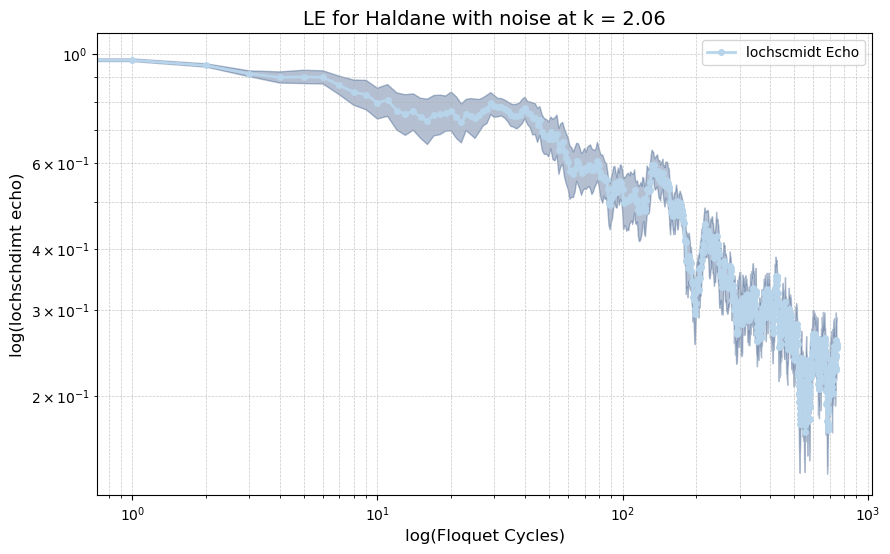

In [179]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array1)), array1, label="lochscmidt Echo", color=colors[0], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array1)), array1 - standard_error1, array1 + standard_error1, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 2.06', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

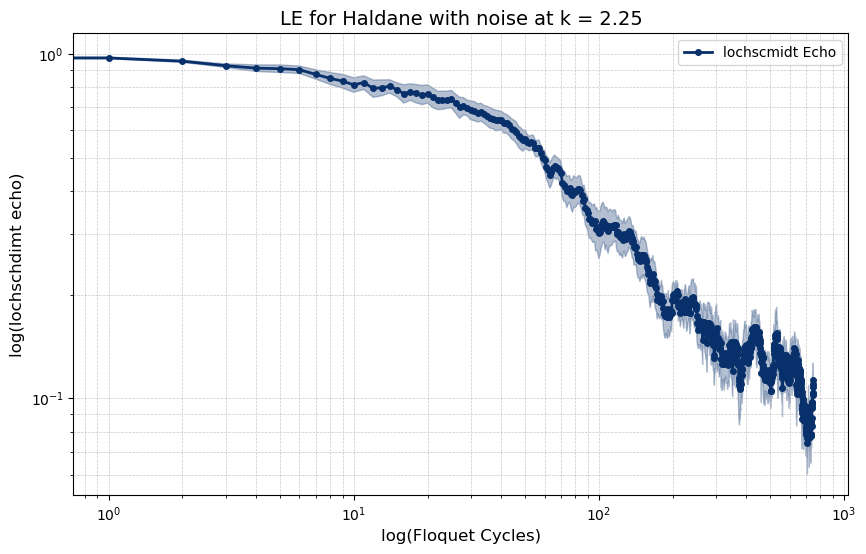

In [180]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array2)), array2, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array2)), array2 - standard_error2, array2 + standard_error2, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 2.25', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

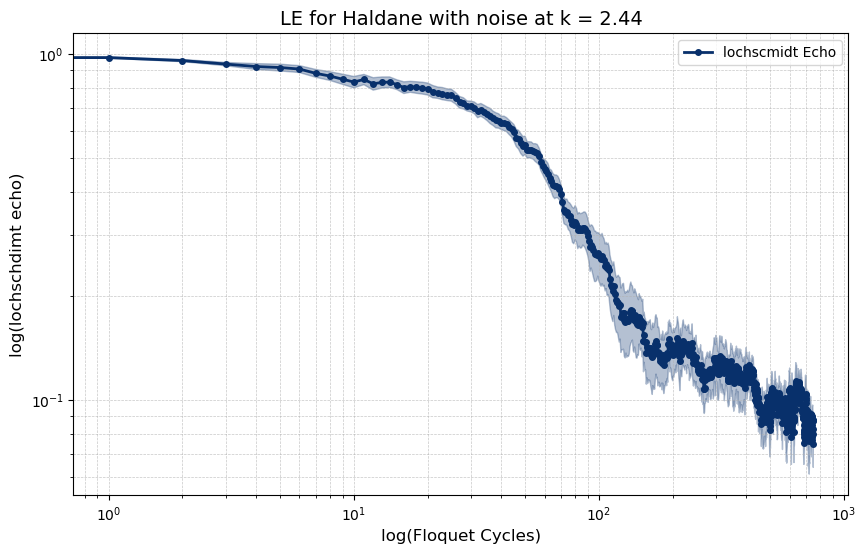

In [181]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array3)), array3, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array3)), array3 - standard_error3, array3 + standard_error3, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

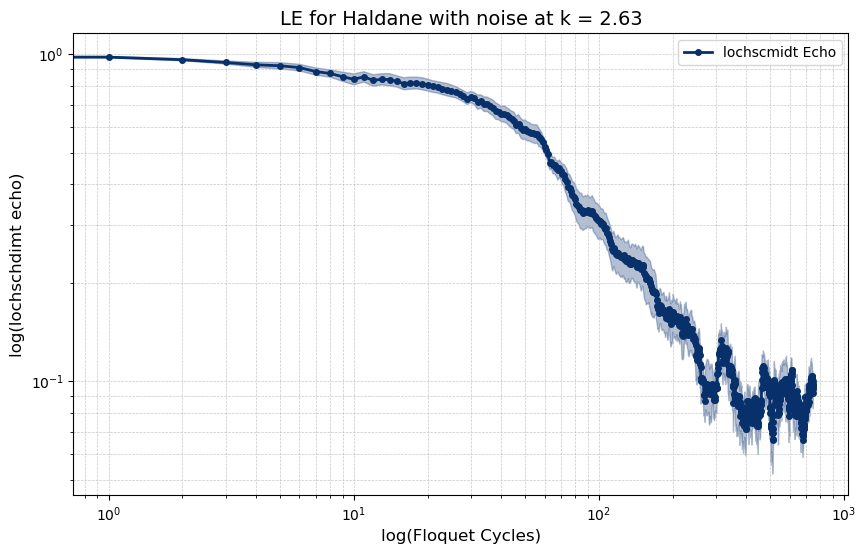

In [182]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array4)), array4, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array4)), array4 - standard_error4, array4 + standard_error4, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 2.63', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

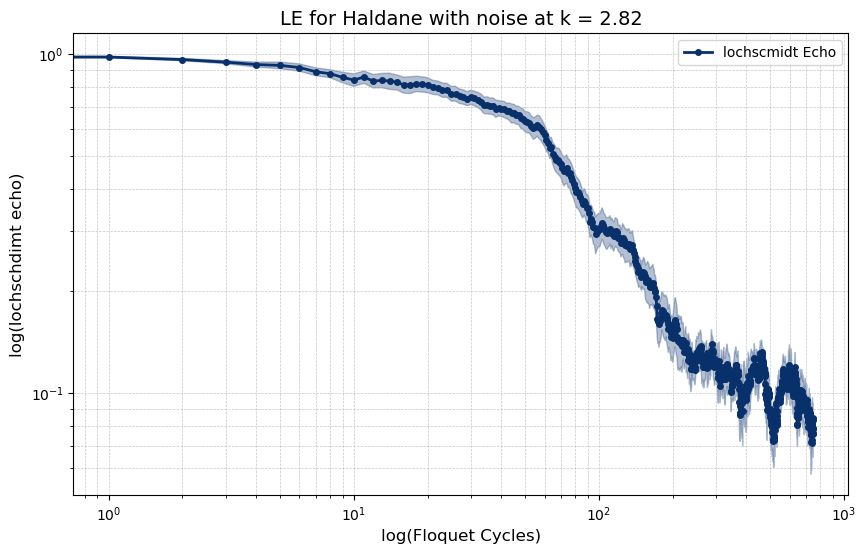

In [183]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array5)), array5, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array5)), array5 - standard_error5, array5 + standard_error5, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 2.82', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

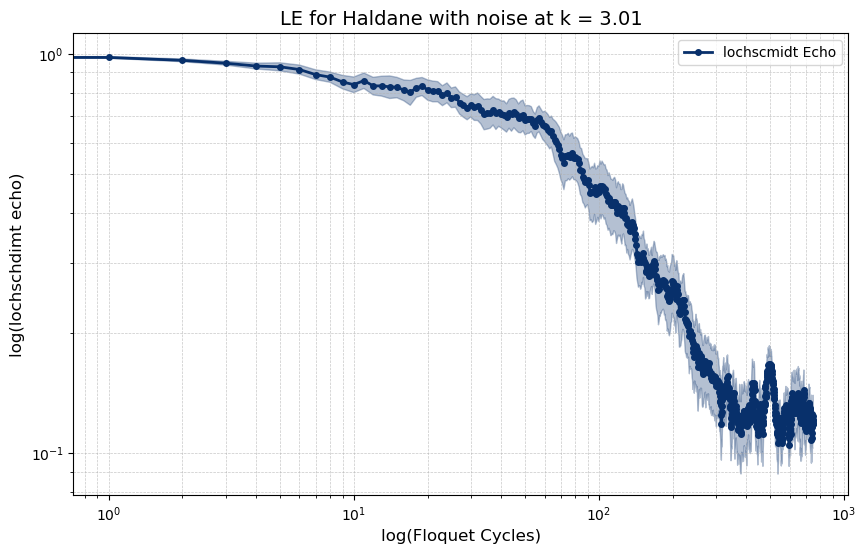

In [184]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array6)), array6, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array6)), array6 - standard_error6, array6 + standard_error6, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 3.01', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

Fitted parameters: A = -0.452, b = 1.448


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/2019819637.py:2: RuntimeWarning: divide by zero encountered in log
  logxaxis = np.log(np.arange(len(logarray)))


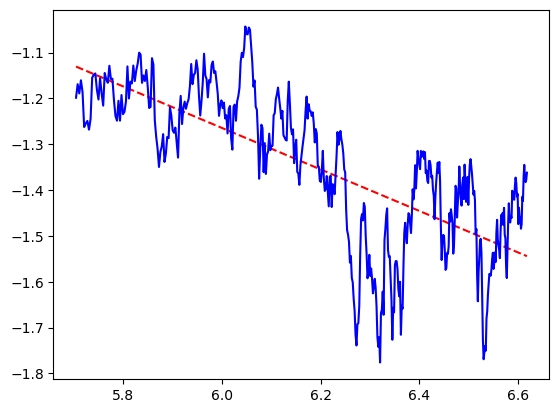

In [185]:
logarray = np.log(array1)
logxaxis = np.log(np.arange(len(logarray)))
logxaxis = logxaxis[300:]
logarray = logarray[300:]
from scipy.optimize import curve_fit

# Define the function A*x**b + c
def linear_eqn(x, A, b):
    return A*x + b
#print(logxaxis,logarray)
# Fit the data to the function
popt, _ = curve_fit(linear_eqn, logxaxis,  logarray)

# Extract the parameters
A, b = popt
print(f"Fitted parameters: A = {A:.3f}, b = {b:.3f}")
fitted_line = A * logxaxis + b
plt.plot(logxaxis, fitted_line, label=f'Linear fit: y = {A:.3f}x + {b:.3f}', color='red', linestyle='--')
plt.plot(logxaxis, logarray, label='Log-Log Data', color='blue')
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/959152665.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


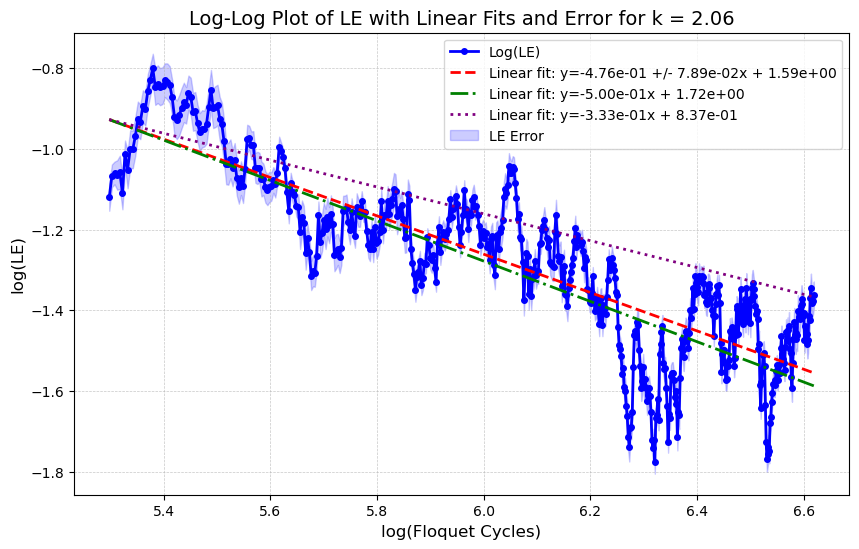

R^2 value of the linear fit: 0.7129
Linear fit parameters (0-150): slope = -4.76e-01, intercept = 1.59e+00


In [186]:
from scipy.optimize import curve_fit
LE_Val = array1
LE_Error = standard_error1
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
LE_Error_plot = LE_Error[200:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(cov[1, 1])
intercept_150_error = np.sqrt(cov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)



# Plot the full log(LE) curve
plt.figure(figsize=(10, 6))

# Plot the full log(LE) curve with enhanced styling
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y={slope_150:.2e} +/- {slope_error_150:.2e}x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}', color='green', linestyle='-.', linewidth=2)
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}', color='purple', linestyle=':', linewidth=2)

# Plot the LE_Error as a shaded region
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error[200:], LE_Val_plot + LE_Error[200:], color='blue', alpha=0.2, label='LE Error')

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Log-Log Plot of LE with Linear Fits and Error for k = 2.06', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(LE)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add R^2 value as text on the plot
#plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot



/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/2497056817.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


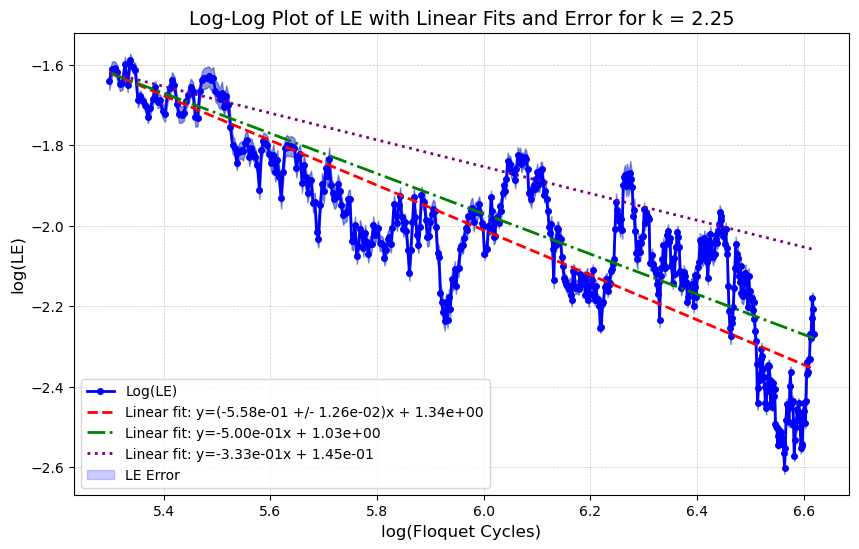

R^2 value of the linear fit: 0.6529
Linear fit parameters (0-150): slope = -5.58e-01, intercept = 1.34e+00


In [187]:
from scipy.optimize import curve_fit
LE_Val = array2
LE_Error = standard_error2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
LE_Error_plot = LE_Error[200:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[1, 1])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)



# Plot the full log(LE) curve
plt.figure(figsize=(10, 6))

# Plot the full log(LE) curve with enhanced styling
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot, alpha=0.3, color=colors[1])
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}', color='green', linestyle='-.', linewidth=2)
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}', color='purple', linestyle=':', linewidth=2)

# Plot the LE_Error as a shaded region
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error[200:], LE_Val_plot + LE_Error[200:], color='blue', alpha=0.2, label='LE Error')

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Log-Log Plot of LE with Linear Fits and Error for k = 2.25', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(LE)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add R^2 value as text on the plot
#plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/248895583.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


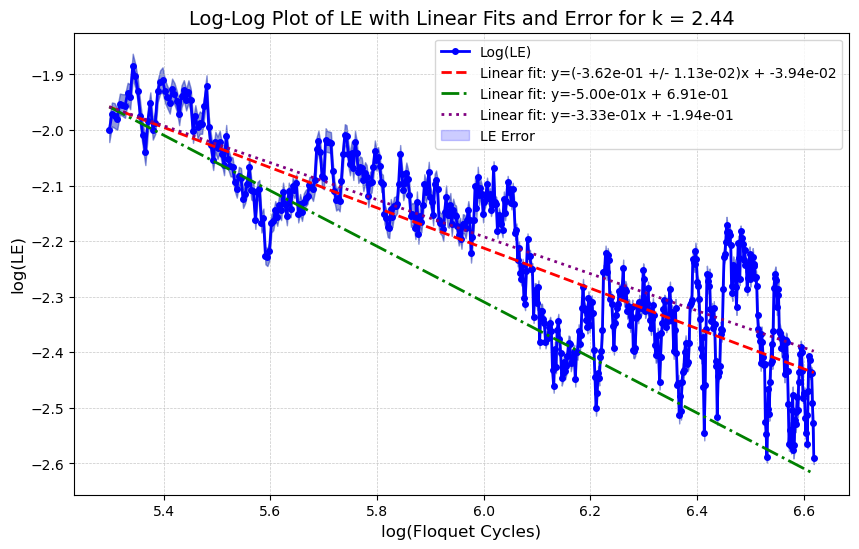

R^2 value of the linear fit: 0.7229
Linear fit parameters (0-150): slope = -3.62e-01, intercept = -3.94e-02


In [188]:
from scipy.optimize import curve_fit
LE_Val = array3
LE_Error = standard_error3
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
LE_Error_plot = LE_Error[200:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[1, 1])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)



# Plot the full log(LE) curve
plt.figure(figsize=(10, 6))

# Plot the full log(LE) curve with enhanced styling
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot, alpha=0.3, color=colors[1])
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}', color='green', linestyle='-.', linewidth=2)
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}', color='purple', linestyle=':', linewidth=2)

# Plot the LE_Error as a shaded region
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error[200:], LE_Val_plot + LE_Error[200:], color='blue', alpha=0.2, label='LE Error')

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Log-Log Plot of LE with Linear Fits and Error for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(LE)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add R^2 value as text on the plot
#plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/3771177442.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


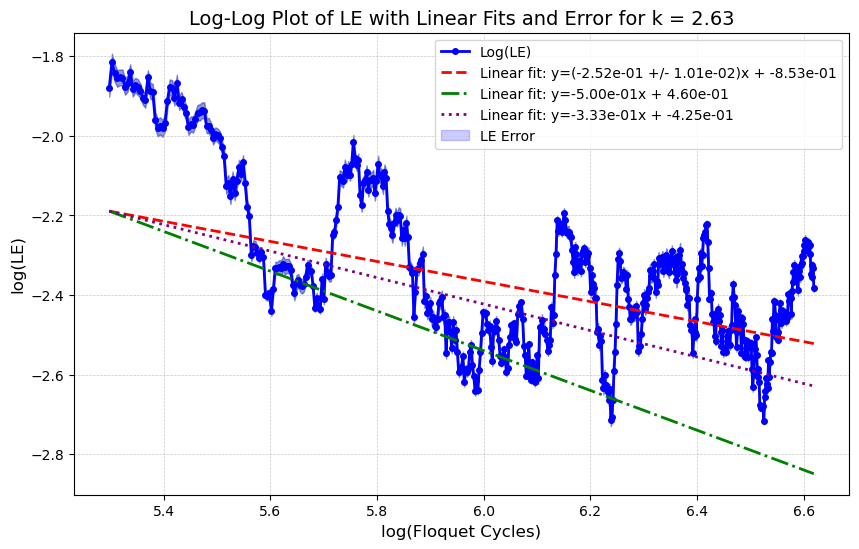

R^2 value of the linear fit: 0.3535
Linear fit parameters (0-150): slope = -2.52e-01, intercept = -8.53e-01


In [189]:
from scipy.optimize import curve_fit
LE_Val = array4
LE_Error = standard_error4
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
LE_Error_plot = LE_Error[200:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[1, 1])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)



# Plot the full log(LE) curve
plt.figure(figsize=(10, 6))

# Plot the full log(LE) curve with enhanced styling
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot, alpha=0.3, color=colors[1])
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}', color='green', linestyle='-.', linewidth=2)
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}', color='purple', linestyle=':', linewidth=2)

# Plot the LE_Error as a shaded region
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error[200:], LE_Val_plot + LE_Error[200:], color='blue', alpha=0.2, label='LE Error')

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Log-Log Plot of LE with Linear Fits and Error for k = 2.63', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(LE)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add R^2 value as text on the plot
#plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot



/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/3611839842.py:4: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


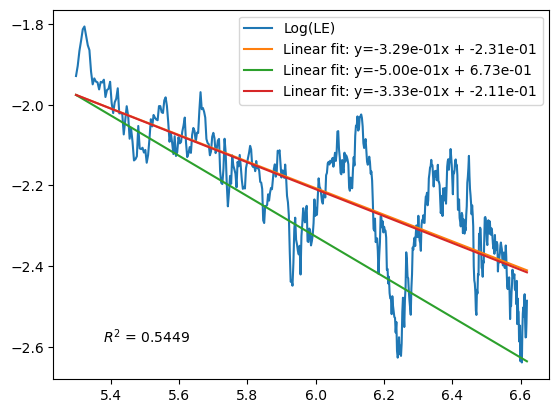

R^2 value of the linear fit: 0.5449
Linear fit parameters (0-150): slope = -3.29e-01, intercept = -2.31e-01


In [190]:
LE_Val = array5
LE_Error = standard_error5
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')



# Perform a linear fit from 0 to 300 time steps
slope_150, intercept_150 = np.polyfit(x_log_plot, LE_Val_plot, 1)
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)


# Plot the full log(LE) curve
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y={slope_150:.2e}x + {intercept_150:.2e}')
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}')
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}')
plt.legend()
plt.text(0.1, 0.1, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes)
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/1701325962.py:4: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


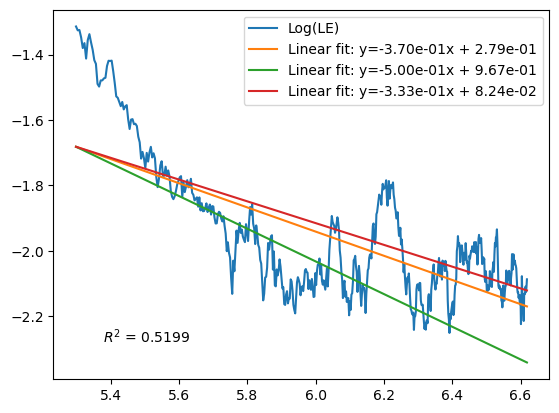

R^2 value of the linear fit: 0.5199
Linear fit parameters (0-150): slope = -3.70e-01, intercept = 2.79e-01


In [191]:
LE_Val = array6
LE_Error = standard_error6
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')



# Perform a linear fit from 0 to 300 time steps
slope_150, intercept_150 = np.polyfit(x_log_plot, LE_Val_plot, 1)
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)


# Plot the full log(LE) curve
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y={slope_150:.2e}x + {intercept_150:.2e}')
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}')
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}')
plt.legend()
plt.text(0.1, 0.1, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes)
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


dict_keys(['LE_Hal_edge_state_750_1500_k_site_99.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])


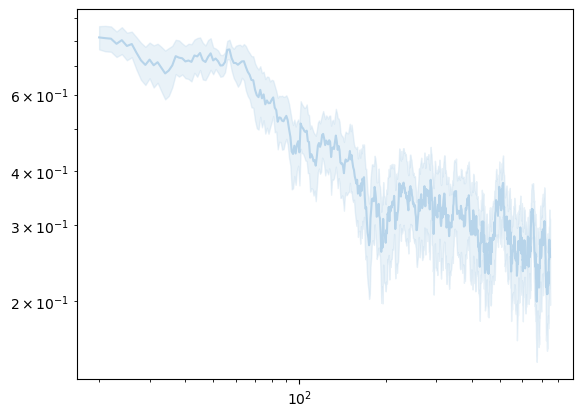

In [192]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_eigenfunc')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 99
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'LE_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'LE_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(20, len(array99)), array99[20:], label='array99', color=colors[0])
plt.fill_between(np.arange(20, len(array99)), array99[20:] - standard_error99[20:], array99[20:] + standard_error99[20:], alpha=0.3, color=colors[0])


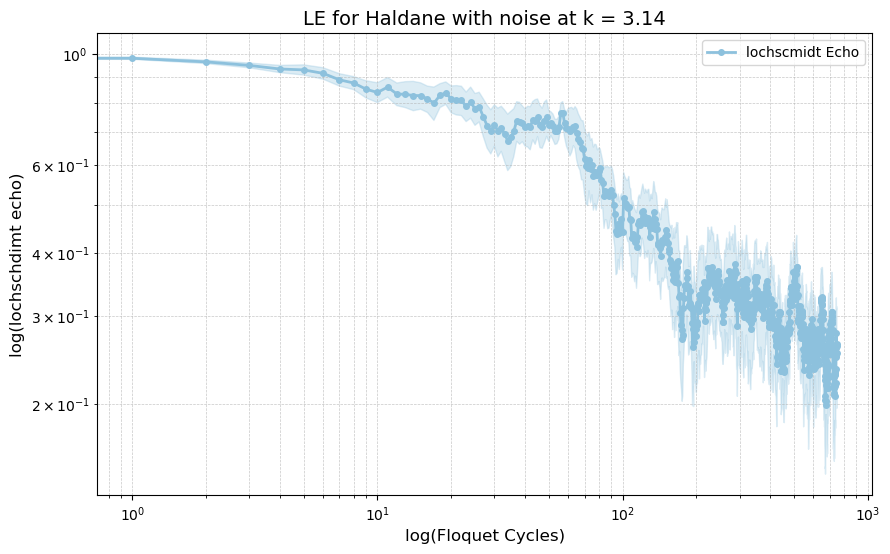

In [193]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array99)), array99, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/3711199887.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


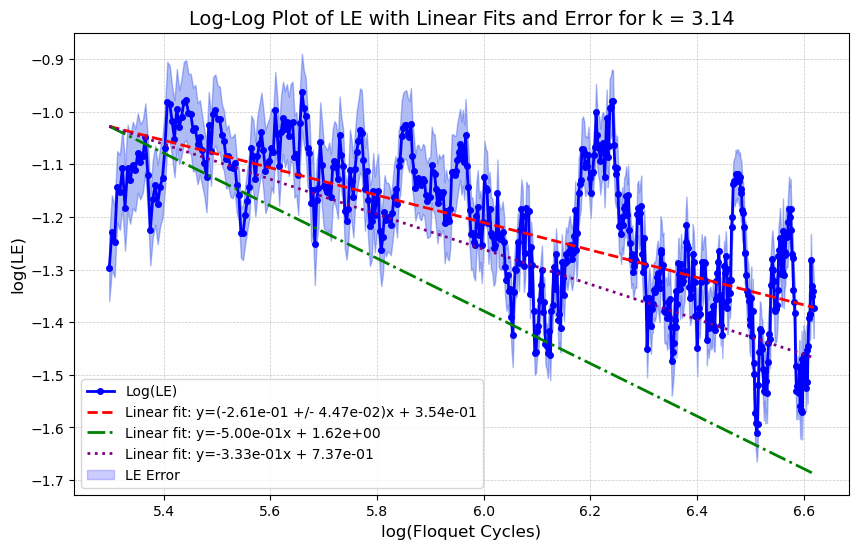

R^2 value of the linear fit: 0.4741
Linear fit parameters (0-150): slope = -2.61e-01, intercept = 3.54e-01


In [194]:
from scipy.optimize import curve_fit
LE_Val = array99
LE_Error = standard_error99
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
LE_Error_plot = LE_Error[200:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[1, 1])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)



# Plot the full log(LE) curve
plt.figure(figsize=(10, 6))

# Plot the full log(LE) curve with enhanced styling
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot, alpha=0.3, color=colors[1])
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}', color='green', linestyle='-.', linewidth=2)
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}', color='purple', linestyle=':', linewidth=2)

# Plot the LE_Error as a shaded region
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error[200:], LE_Val_plot + LE_Error[200:], color='blue', alpha=0.2, label='LE Error')

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Log-Log Plot of LE with Linear Fits and Error for k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(LE)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add R^2 value as text on the plot
#plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


In [195]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

ky_indices = list(range(82, 100, 3))
ky_list = np.linspace(-np.pi, np.pi, 100)
ky_values = [ky_list[idx] for idx in ky_indices]

ky_indices = list(range(82, 100, 3)) + [99]
ky_list = np.linspace(-np.pi, np.pi, 100)
ky_values = [ky_list[idx] for idx in ky_indices]
# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
for idx, site in enumerate(range(82, 100, 3), start=1):
    # Walk through the directory
    for root, dirs, files in os.walk(downloads_folder):
        # Filter out only the .txt files that match the pattern
        txt_files = [file for file in files if file.startswith(f'LE_Hal_edge_state_750_500_k_site_{site}') and file.endswith('.txt')]

        # Load each file and store it in the dictionary
        for txt_file in txt_files:
            file_path = os.path.join(root, txt_file)
            data = np.loadtxt(file_path)
            le_ana_arrays[txt_file] = data

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Initialize a dictionary to store the arrays from each directory
    le_ana_arrays = {}

    # Loop through directories b0 to b95
    for i in range(96):
        dir_path = os.path.join(downloads_folder, f'b{i}')
        le_ana_large_path = os.path.join(dir_path, f'LE_Hal_edge_state_750_500_k_site_{site}.txt')
        
        if os.path.exists(le_ana_large_path):
            le_ana_large = np.loadtxt(le_ana_large_path)
            le_ana_arrays[f'b{i}_large'] = le_ana_large

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Convert the dictionary values to a numpy array for easier manipulation
    plot_data = np.array(list(le_ana_arrays.values()))

    # Calculate the average and standard error
    globals()[f'array{idx}'] = np.mean(plot_data, axis=0)
    globals()[f'standard_error{idx}'] = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

    # Plot the arrays using the blue color schemes
    colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
    plt.loglog(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:], label=f'Array {idx}', color=colors[idx % len(colors)])
    plt.fill_between(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:] - globals()[f'standard_error{idx}'][20:], globals()[f'array{idx}'][20:] + globals()[f'standard_error{idx}'][20:], alpha=0.3, color=colors[idx % len(colors)])

plt.legend()
plt.show()

# Define the arrays and their standard errors
arrays = [array1, array2]
standard_errors = [standard_error1, standard_error2]
print(arrays)
labels = [f'Array {i+1}' for i in range(len(arrays))]
print(labels)

# Plot the arrays with their standard errors
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
print(colors)

for i, (array, std_err, label) in enumerate(zip(arrays, standard_errors, labels)):
    plt.loglog(np.arange(len(array)), array, label=label, color=colors[i])
    plt.fill_between(np.arange(len(array)), array - std_err, array + std_err, alpha=0.3, color=colors[i])

plt.title('First 2 Arrays with Standard Errors')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

dict_keys([])
dict_keys([])


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TypeError: object of type 'numpy.float64' has no len()

dict_keys(['LE_Hal_edge_state_750_500_k_site_88.txt'])
dict_keys(['b0_large', 'b1_large', 'b2_large', 'b3_large', 'b4_large', 'b5_large', 'b6_large', 'b7_large', 'b8_large', 'b9_large', 'b10_large', 'b11_large', 'b12_large', 'b13_large', 'b14_large', 'b15_large', 'b16_large', 'b17_large', 'b18_large', 'b19_large', 'b20_large', 'b21_large', 'b22_large', 'b23_large', 'b24_large', 'b25_large', 'b26_large', 'b27_large', 'b28_large', 'b29_large', 'b30_large', 'b31_large', 'b32_large', 'b33_large', 'b34_large', 'b35_large', 'b36_large', 'b37_large', 'b38_large', 'b39_large', 'b40_large', 'b41_large', 'b42_large', 'b43_large', 'b44_large', 'b45_large', 'b46_large', 'b47_large', 'b48_large', 'b49_large', 'b50_large', 'b51_large', 'b52_large', 'b53_large', 'b54_large', 'b55_large', 'b56_large', 'b57_large', 'b58_large', 'b59_large', 'b60_large', 'b61_large', 'b62_large', 'b63_large', 'b64_large', 'b65_large', 'b66_large', 'b67_large', 'b68_large', 'b69_large', 'b70_large', 'b71_large', 'b72_lar

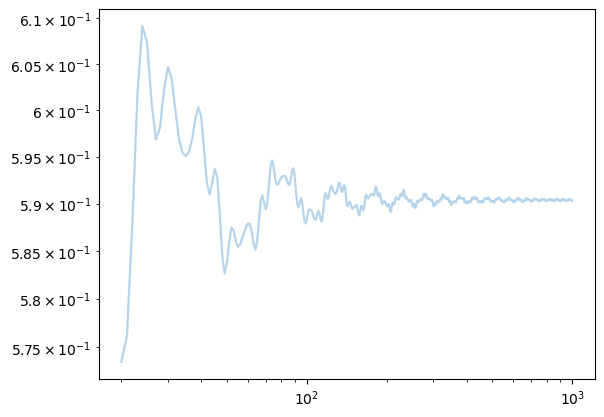

In [196]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 88
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'LE_Hal_edge_state_750_500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'LE_Hal_edge_state_750_500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(20, len(array99)), array99[20:], label='array99', color=colors[0])
plt.fill_between(np.arange(20, len(array99)), array99[20:] - standard_error99[20:], array99[20:] + standard_error99[20:], alpha=0.3, color=colors[0])


dict_keys(['LE_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b0_large', 'b1_large', 'b2_large', 'b3_large', 'b4_large', 'b5_large', 'b6_large', 'b7_large', 'b8_large', 'b9_large', 'b10_large', 'b11_large', 'b12_large', 'b13_large', 'b14_large', 'b15_large', 'b16_large', 'b17_large', 'b18_large', 'b19_large', 'b20_large', 'b21_large', 'b22_large', 'b23_large', 'b24_large', 'b25_large', 'b26_large', 'b27_large', 'b28_large', 'b29_large', 'b30_large', 'b31_large', 'b32_large', 'b33_large', 'b34_large', 'b35_large', 'b36_large', 'b37_large', 'b38_large', 'b39_large', 'b40_large', 'b41_large', 'b42_large', 'b43_large', 'b44_large', 'b45_large', 'b46_large', 'b47_large', 'b48_large', 'b49_large', 'b50_large', 'b51_large', 'b52_large', 'b53_large', 'b54_large', 'b55_large', 'b56_large', 'b57_large', 'b58_large', 'b59_large', 'b60_large', 'b61_large', 'b62_large', 'b63_large', 'b64_large', 'b65_large', 'b66_large', 'b67_large', 'b68_large', 'b69_large', 'b70_large', 'b71_large', 'b72_la

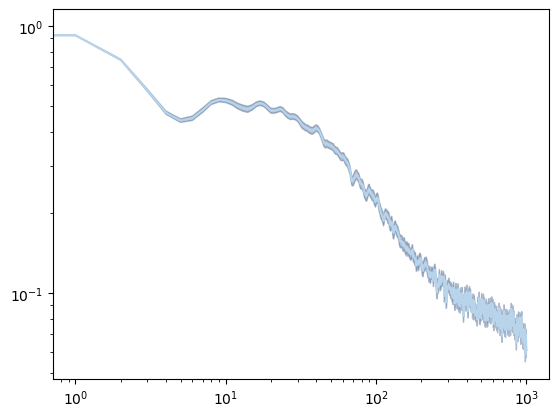

In [2]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 88
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'LE_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'LE_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(len(array99)), array99, label='array99', color=colors[0])
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.arange(len(array99))
y = array99
y_err = standard_error99  # Optional, if you have error data


# ——— load or define your data arrays x, y, (and y_err if available) ———
# x = np.load('x_data.npy')
# y = np.load('y_data.npy')
# y_err = np.load('y_err.npy')    # optional

# make sure they’re 1D and all the same length
x     = np.asarray(x).ravel()
y     = np.asarray(y).ravel()
y_err = np.asarray(y_err).ravel()

print(x.shape, y.shape, y_err.shape)  # should all print (N,)

# your model
def two_term_model(x, t, n, a):
    return np.exp(-x/t)/(1+(x/t)**n) + x**(-a)/(1+(t/x)**n)

# now curve_fit will accept sigma of the correct shape
p0 = [76.0, 1.2, 0.396]
popt, pcov = curve_fit(two_term_model, x, y,
                       p0=p0, sigma=y_err,
                       absolute_sigma=True,
                       bounds=([0,0,0],[np.inf,np.inf,np.inf]))

print("Fit parameters:", popt)
print("Parameter errors:", np.sqrt(np.diag(pcov)))

(1000,) (1000,) (1000,)


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:968: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/913446555.py:24: RuntimeWarning: divide by zero encountered in power
  return np.exp(-x/t)/(1+(x/t)**n) + x**(-a)/(1+(t/x)**n)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/913446555.py:24: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-x/t)/(1+(x/t)**n) + x**(-a)/(1+(t/x)**n)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/913446555.py:24: RuntimeWarning: invalid value encountered in divide
  return np.exp(-x/t)/(1+(x/t)**n) + x**(-a)/(1+(t/x)**n)


ValueError: Residuals are not finite in the initial point.

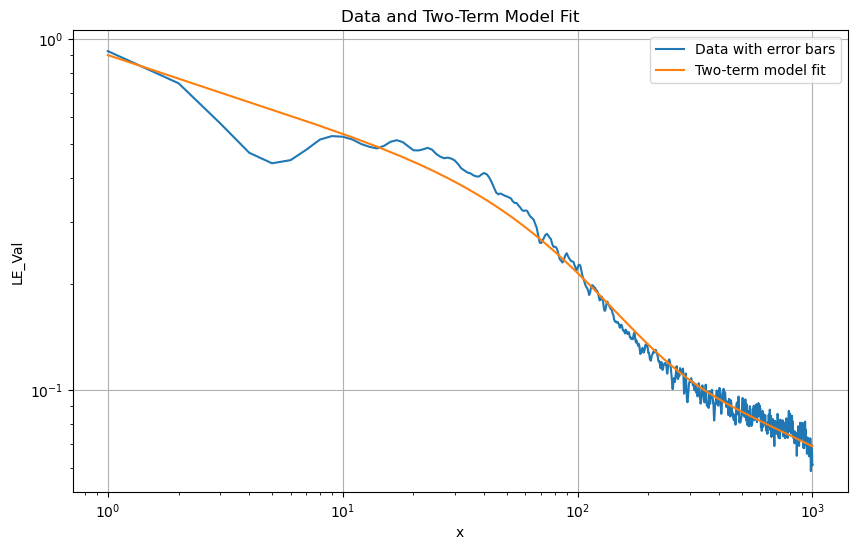

Fitted parameters:
  t = 75.311370 ± 0.796796
  n = 0.265111 ± 0.003235
  a = 0.321521 ± 0.001038
  b = 0.636768 ± 0.003983


In [31]:
import numpy as np
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 6))
# load and flatten
x = np.arange(len(array99))
y = array99
y_err = standard_error99  # Optional, if you have error data

# drop x ≤ 0
mask = x > 0
x, y, y_err = x[mask], y[mask], y_err[mask]

# floor any zero errors
eps = np.median(y_err[y_err>0]) * 1e-3
y_err = np.where(y_err>0, y_err, eps)

# model definition
def two_term_model(x, t, n, a, b):
    return n*np.exp(-x/t) + b*x**(-a)

# initial guess and bounds
p0 = [76.0, 1.2, 0.396, 0.4]
bounds = ([1e-8, 0.0, 0.0, 0.0], [np.inf, np.inf, np.inf, np.inf])

# now call curve_fit
popt, pcov = curve_fit(
    two_term_model, x, y,
    p0=p0, bounds=bounds,
    sigma=y_err, absolute_sigma=True
)

# Generate smooth curve for the fitted model
x_fit = np.linspace(np.min(x), np.max(x), 300)
y_fit = two_term_model(x_fit, *popt)

# Plot data with error bars and fitted curve
plt.loglog(x, y, label='Data with error bars')
plt.loglog(x_fit, y_fit, label='Two-term model fit')
plt.xlabel('x')
plt.ylabel('LE_Val')
plt.title('Data and Two-Term Model Fit')
plt.legend()
plt.grid(True)
plt.show()
t_fit, n_fit, a_fit, b_fit = popt
t_err, n_err, a_err, b_err= np.sqrt(np.diag(pcov))
print(f"Fitted parameters:")
print(f"  t = {t_fit:.6f} ± {t_err:.6f}")
print(f"  n = {n_fit:.6f} ± {n_err:.6f}")
print(f"  a = {a_fit:.6f} ± {a_err:.6f}")
print(f"  b = {b_fit:.6f} ± {b_err:.6f}")

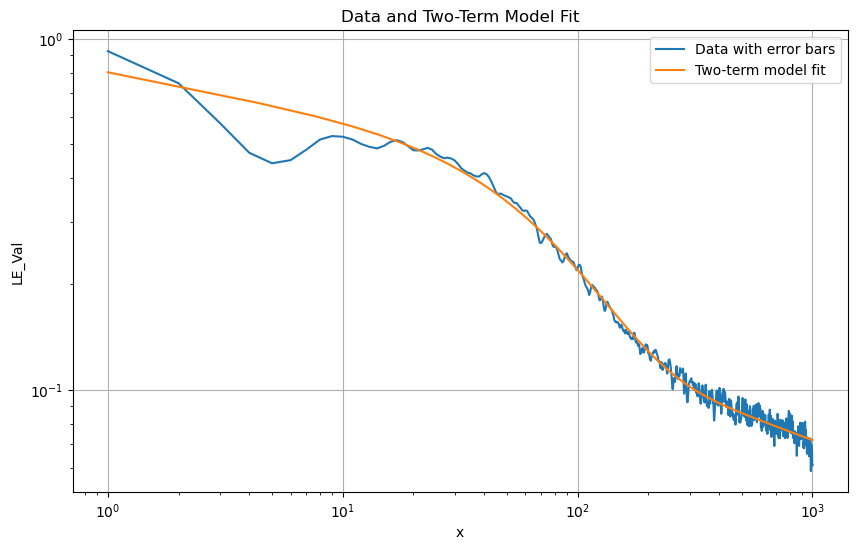

Fitted parameters:
  t = 67.818166 ± 0.719954
  n = 0.398168 ± 0.004875
  a = 0.252039 ± 0.005554
  b = 0.410101 ± 0.014687


In [20]:
import numpy as np
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 6))
# load and flatten
x = np.arange(len(array99))
y = array99
y_err = standard_error99  # Optional, if you have error data
x_fit = x[10:]
y_fit = y[10:]
y_err_fit = y_err[10:]  # Optional, if you have error data  
# drop x ≤ 0
mask = x > 0
x, y, y_err = x[mask], y[mask], y_err[mask]

# floor any zero errors
eps = np.median(y_err[y_err>0]) * 1e-3
y_err = np.where(y_err>0, y_err, eps)

# model definition
def two_term_model(x, t, n, a, b):
    return n*np.exp(-x/t) + b*x**(-a)

# initial guess and bounds
p0 = [76.0, 1.2, 0.396, 0.4]
bounds = ([1e-8, 0.0, 0.0, 0.0], [np.inf, np.inf, np.inf, np.inf])

# now call curve_fit
popt, pcov = curve_fit(
    two_term_model, x_fit, y_fit,
    p0=p0, bounds=bounds,
    sigma=y_err_fit, absolute_sigma=True
)

# Generate smooth curve for the fitted model
x_fit = np.linspace(np.min(x), np.max(x), 300)
y_fit = two_term_model(x_fit, *popt)

# Plot data with error bars and fitted curve
plt.loglog(x, y, label='Data with error bars')
plt.loglog(x_fit, y_fit, label='Two-term model fit')
plt.xlabel('x')
plt.ylabel('LE_Val')
plt.title('Data and Two-Term Model Fit')
plt.legend()
plt.grid(True)
plt.show()
t_fit, n_fit, a_fit, b_fit = popt
t_err, n_err, a_err, b_err= np.sqrt(np.diag(pcov))
print(f"Fitted parameters:")
print(f"  t = {t_fit:.6f} ± {t_err:.6f}")
print(f"  n = {n_fit:.6f} ± {n_err:.6f}")
print(f"  a = {a_fit:.6f} ± {a_err:.6f}")
print(f"  b = {b_fit:.6f} ± {b_err:.6f}")

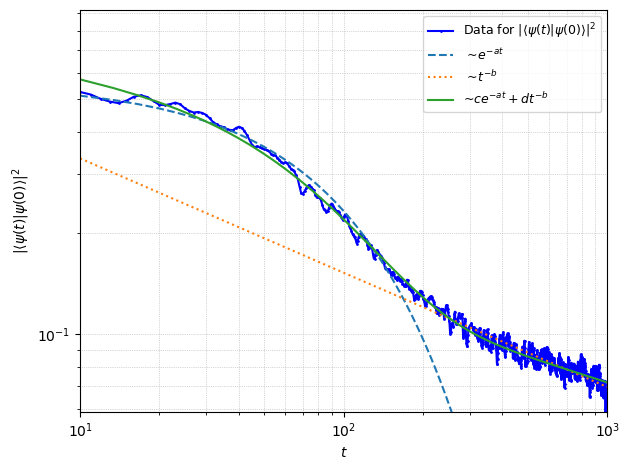

In [21]:
from scipy.optimize import curve_fit

# Generate smooth curve for the fitted model
x_fit = np.linspace(10, 1000, 300)  # Restrict x_fit to the range 10 to 1000
y_fit = two_term_model(x_fit, *popt)
# Fit a line to the function a * e^(-b * x) for x in the range 10 to 100

# Define the function
def exp_decay(x, a, b):
    return a * np.exp(-b * x)
def power_law(x, a, b):
    return a * x**(-b)

# Restrict x and y to the range 10 to 100
mask = (x >= 10) & (x <= 200)
x_fit_range = x[mask]
y_fit_range = y[mask]

# Range for fitting power law
mask = (x >= 200) & (x <= 1000)
x_fit_range_power = x[mask]
y_fit_range_power = y[mask]

# Perform the curve fitting for the two-term model
popt_power, _ = curve_fit(power_law, x_fit_range_power, y_fit_range_power, p0=[1, 0.5])
# Perform the curve fitting
popt_exp, _ = curve_fit(exp_decay, x_fit_range, y_fit_range, p0=[1, 0.1])

# Generate the fitted line
y_fit_exp = exp_decay(x_fit, *popt_exp)
y_fit_power = power_law(x_fit, *popt_power)
# Plot the fitted line
plt.loglog(x, y, label=r'Data for $|\langle \psi(t) | \psi(0) \rangle|^2$', marker='o', markersize=1, color='blue')
plt.loglog(x_fit, y_fit_exp, label=r' ~$e^{-at}$', linestyle='--')
plt.loglog(x_fit, y_fit_power, label=r' ~$t^{-b}$', linestyle=':')
# Plot data with error bars and fitted curve
#plt.figure(figsize=(10, 6))
plt.loglog(x_fit, y_fit, label=r'~$ce^{-at} + dt^{-b}$')
plt.xlim(10, 1000)  # Set x-axis limits
plt.ylim(np.min(y), np.max(y))  # Set y-axis limits
plt.xlabel(r'$t$')
plt.ylabel(r'$|\langle \psi(t) | \psi(0) \rangle|^2$')

# legend
plt.legend(loc='upper right', fontsize=9)

# grid
plt.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
plt.show()


In [7]:
# Define the range for x
x_range = np.arange(10, 1001)

# Calculate the two-term model values
y_two_term_model = two_term_model(x_range, *popt)

# Print the results
for x_val, y_val in zip(x_range, y_two_term_model):
    print(f"x = {x_val}, y = {y_val}")

from scipy.integrate import quad

# Define the function to integrate
def integrand(x):
    return two_term_model(x, *popt)
print(quad(integrand, 10, 1000))

x = 10, y = 0.5731174885852698
x = 11, y = 0.5626402540812627
x = 12, y = 0.5528240084754255
x = 13, y = 0.5435627594237162
x = 14, y = 0.5347756107457454
x = 15, y = 0.5263994576490842
x = 16, y = 0.5183841418715778
x = 17, y = 0.510689139812301
x = 18, y = 0.5032812389132097
x = 19, y = 0.496132870046682
x = 20, y = 0.4892208866375567
x = 21, y = 0.48252565493723726
x = 22, y = 0.47603036539446364
x = 23, y = 0.4697205039667173
x = 24, y = 0.46358344100883175
x = 25, y = 0.45760810786339595
x = 26, y = 0.4517847397399135
x = 27, y = 0.44610466930681597
x = 28, y = 0.44056015951240646
x = 29, y = 0.43514426706221676
x = 30, y = 0.4298507300800931
x = 31, y = 0.4246738750139709
x = 32, y = 0.4196085389804977
x = 33, y = 0.41465000458907797
x = 34, y = 0.40979394492447996
x = 35, y = 0.4050363768534531
x = 36, y = 0.4003736211944068
x = 37, y = 0.39580226857858924
x = 38, y = 0.39131915005709883
x = 39, y = 0.3869213116856673
x = 40, y = 0.382605992459767
x = 41, y = 0.3783706050846291


In [8]:
import numpy as np
from scipy.integrate import cumulative_trapezoid

# Example data: replace with your actual x and f(x)
x = np.linspace(0, 10, 1001)      # 0 to 10 in 0.01 steps
fx = np.sin(x)                    # example: f(x) = sin(x)

# Method 1: via two cumulative integrals
# G(t) = t * ∫0^t f(x) dx  - ∫0^t x f(x) dx

# 1a) cumulative integral of f(x): F1[i] ≈ ∫0^x[i] f(x) dx
F1 = cumulative_trapezoid(fx, x, initial=0)

# 1b) cumulative integral of x*f(x): F2[i] ≈ ∫0^x[i] x*f(x) dx
F2 = cumulative_trapezoid(x * fx, x, initial=0)

# then g[i] = x[i] * F1[i] - F2[i]
g1 = x * F1 - F2


# Method 2: direct convolution (discrete approximation)
# We note (t-x)f(x) is a convolution of f(x) with kernel k(x)=x
# but implemented here by a direct trapezoidal loop:

g2 = np.zeros_like(x)
for i, ti in enumerate(x):
    # integrate from 0 to ti of (ti - x[j]) * f(x[j]) dx
    integrand = (ti - x[:i+1]) * fx[:i+1]
    g2[i] = np.trapz(integrand, x[:i+1])


# Compare the two results
print("Max abs difference:", np.max(np.abs(g1 - g2)))


Max abs difference: 2.3092638912203256e-14


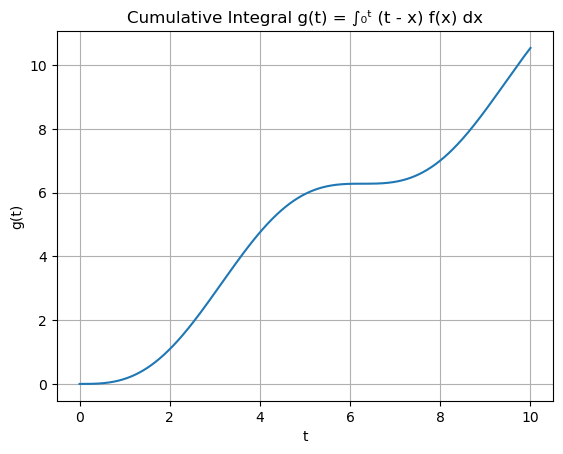

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# Example data: replace with your actual x and f(x)
x = np.linspace(0, 10, 1001)      # 0 to 10 in 0.01 steps
fx = np.sin(x)                    # example: f(x) = sin(x)

# Compute g(t) using Method 1:
# g(t) = t * ∫0^t f(x) dx - ∫0^t x f(x) dx
F1 = cumulative_trapezoid(fx, x, initial=0)
F2 = cumulative_trapezoid(x * fx, x, initial=0)
g = x * F1 - F2

# Plot g(t) vs t
plt.figure()
plt.plot(x, g)
plt.xlabel('t')
plt.ylabel('g(t)')
plt.title('Cumulative Integral g(t) = ∫₀ᵗ (t - x) f(x) dx')
plt.grid(True)
plt.show()


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2604235406.py:17: RuntimeWarning: divide by zero encountered in scalar power
  return 1 - np.abs(n * np.exp(-y/k) + b * y**(-a))
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2604235406.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  return f(y, k, n, a, b) * (c * (t - y))**2
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2604235406.py:25: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))


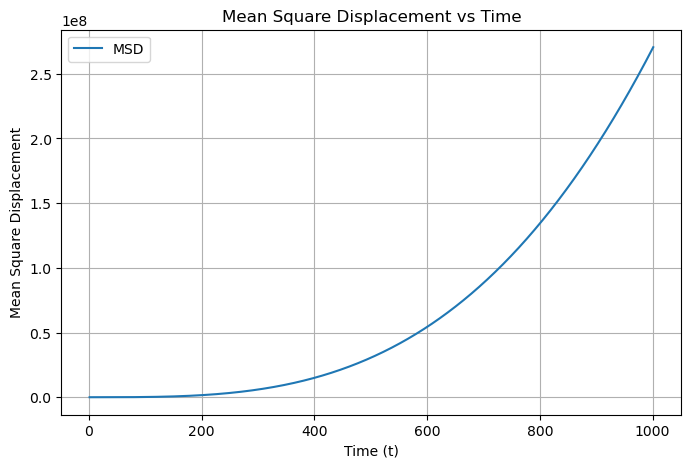

In [10]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Parameters
c = 1.0             # Ballistic velocity
tau = 1.0           # Time scale
gamma = 0.5         # Power-law exponent (>0)

# Probability density of particle creation at time y
def f(y, tau, gamma):
    return gamma * tau**gamma / (y + tau)**(gamma + 1)

k, n, a, b = popt

def f(y, k, n, a, b):
    return 1 - np.abs(n * np.exp(-y/k) + b * y**(-a))

# Integrand for mean square displacement calculation
def integrand(y, t, c, k, n, a, b):
    return f(y, k, n, a, b) * (c * (t - y))**2

# Function to compute mean square displacement at time t
def mean_square_displacement(t, c, k, n, a, b):
    result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))
    return result

# Example usage: Compute MSD for a range of times
times = np.linspace(0, 1001, 1000)
msd_values = [mean_square_displacement(t, c, k, n, a, b) for t in times]

# Plot MSD vs time
plt.figure(figsize=(8,5))
plt.plot(times, msd_values, label="MSD")
plt.xlabel('Time (t)')
plt.ylabel('Mean Square Displacement')
plt.title('Mean Square Displacement vs Time')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/1443751697.py:17: RuntimeWarning: divide by zero encountered in scalar power
  return 1 - np.abs((n**2) * np.exp(-(2*y)/k) + (b**2) * y**(-2*a) +2*n*b * np.exp(-y/k) * y**(-a))
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/1443751697.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  return f(y, k, n, a, b) * (c * (t - y))**2
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/1443751697.py:25: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/1443751697.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))


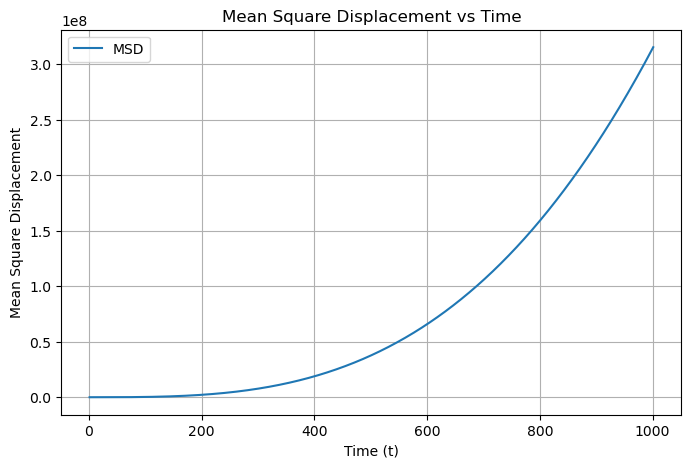

In [11]:


import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Parameters
c = 1.0             # Ballistic velocity
tau = 1.0           # Time scale
gamma = 0.5         # Power-law exponent (>0)

# Probability density of particle creation at time y
def f(y, tau, gamma):
    return gamma * tau**gamma / (y + tau)**(gamma + 1)

k, n, a, b = popt

def f(y, k, n, a, b):
    return 1 - np.abs((n**2) * np.exp(-(2*y)/k) + (b**2) * y**(-2*a) +2*n*b * np.exp(-y/k) * y**(-a))

# Integrand for mean square displacement calculation
def integrand(y, t, c, k, n, a, b):
    return f(y, k, n, a, b) * (c * (t - y))**2

# Function to compute mean square displacement at time t
def mean_square_displacement(t, c, k, n, a, b):
    result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))
    return result

# Example usage: Compute MSD for a range of times
times = np.linspace(0, 1001, 1000)
msd_values = [mean_square_displacement(t, c, k, n, a, b) for t in times]

# Plot MSD vs time
plt.figure(figsize=(8,5))
plt.plot(times, msd_values, label="MSD")
plt.xlabel('Time (t)')
plt.ylabel('Mean Square Displacement')
plt.title('Mean Square Displacement vs Time')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2358418993.py:17: RuntimeWarning: divide by zero encountered in scalar power
  return 1 - np.abs((n**2) * np.exp(-(2*y)/k) + (b**2) * y**(-2*a) +2*n*b * np.exp(-y/k) * y**(-a))
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2358418993.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  return f(y, k, n, a, b) * (c * (t - y))**2
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2358418993.py:25: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2358418993.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))


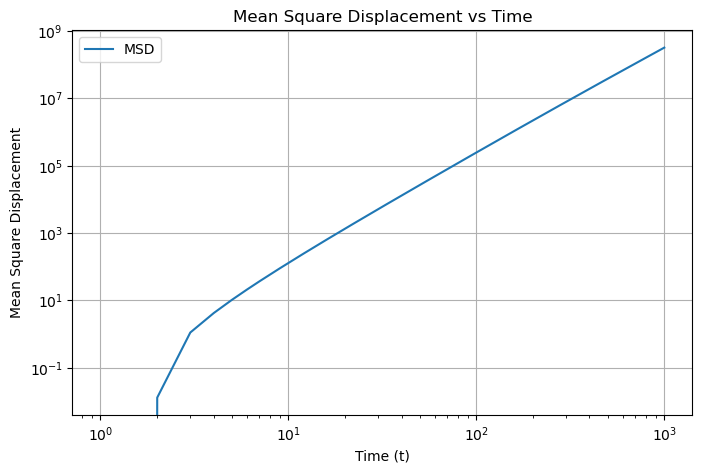

In [12]:


import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Parameters
c = 1.0             # Ballistic velocity
tau = 1.0           # Time scale
gamma = 0.5         # Power-law exponent (>0)

# Probability density of particle creation at time y
def f(y, tau, gamma):
    return gamma * tau**gamma / (y + tau)**(gamma + 1)

k, n, a, b = popt

def f(y, k, n, a, b):
    return 1 - np.abs((n**2) * np.exp(-(2*y)/k) + (b**2) * y**(-2*a) +2*n*b * np.exp(-y/k) * y**(-a))

# Integrand for mean square displacement calculation
def integrand(y, t, c, k, n, a, b):
    return f(y, k, n, a, b) * (c * (t - y))**2

# Function to compute mean square displacement at time t
def mean_square_displacement(t, c, k, n, a, b):
    result, _ = quad(integrand, 0, t, args=(t, c, k, n, a, b))
    return result

# Example usage: Compute MSD for a range of times
times = np.linspace(0, 1001, 1000)
msd_values = [mean_square_displacement(t, c, k, n, a, b) for t in times]

# Plot MSD vs time
plt.figure(figsize=(8,5))
plt.loglog(times, msd_values, label="MSD")
plt.xlabel('Time (t)')
plt.ylabel('Mean Square Displacement')
plt.title('Mean Square Displacement vs Time')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np

c = 1.

k, n, a, b = popt



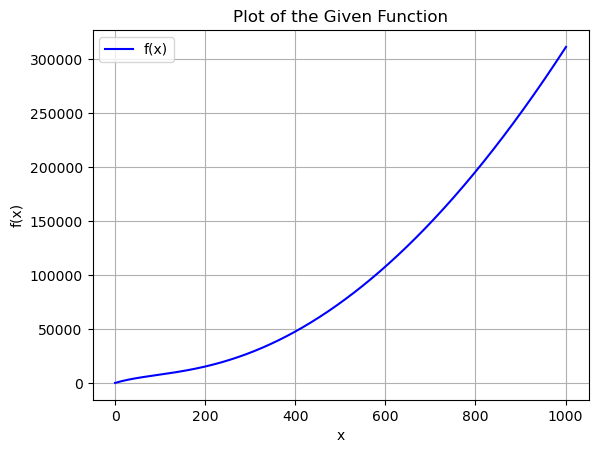

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define parameters (you can adjust these)

K, N, A, B = popt

a = 1/K
b = A
c = N
d = B
k = 1.0

# Define the function
def f(x):
    x = np.array(x)

    term1 = k * x**2 * c

    #term2 = (k * x**3)/3

    term3 = (6*d*k*x**(2-b))/(6-9*b + 3*b**2)

    term4 = (2*c*k*(1 - np.exp(-a*x)-a*x*math.log10(math.e)))/(a**2*(math.log10(math.e))**2)

    return  term1 + term3 + term4

# Plotting
x_vals = np.linspace(0, 1001, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.title('Plot of the Given Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/1036578595.py:1: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.linspace(0, 1001, 1000))
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_9481/2353794938.py:25: RuntimeWarning: invalid value encountered in subtract
  term4 = (2*c*k*(1 - np.exp(-a*x)-a*x*math.log10(math.e)))/(a**2*(math.log10(math.e))**2)


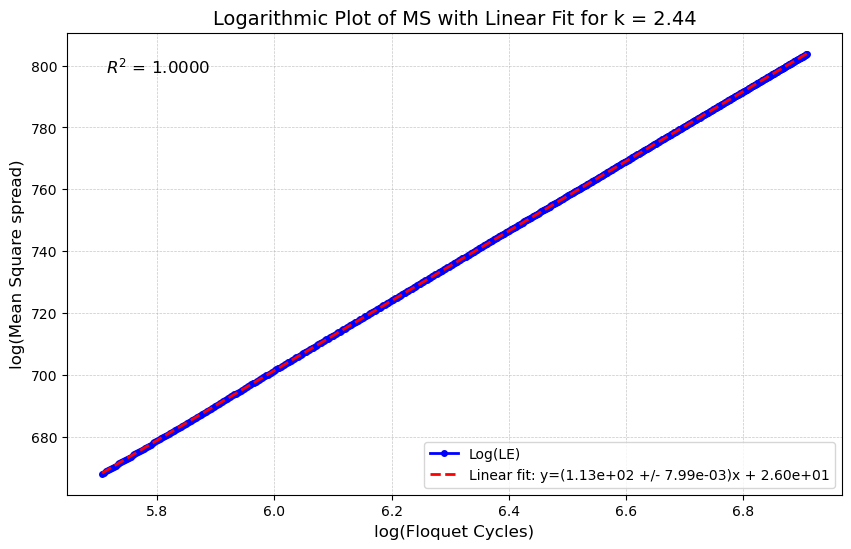

R^2 value of the linear fit: 1.0000
Linear fit parameters (0-150): slope = 1.13e+02, intercept = 2.60e+01


In [34]:

x_log = np.log(np.linspace(0, 1001, 1000))
LE_Val = f(x_log)
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val[300:]
#LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_13809/3329074050.py:4: RuntimeWarning: invalid value encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_13809/3329074050.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.linspace(0, 1001, 1000))


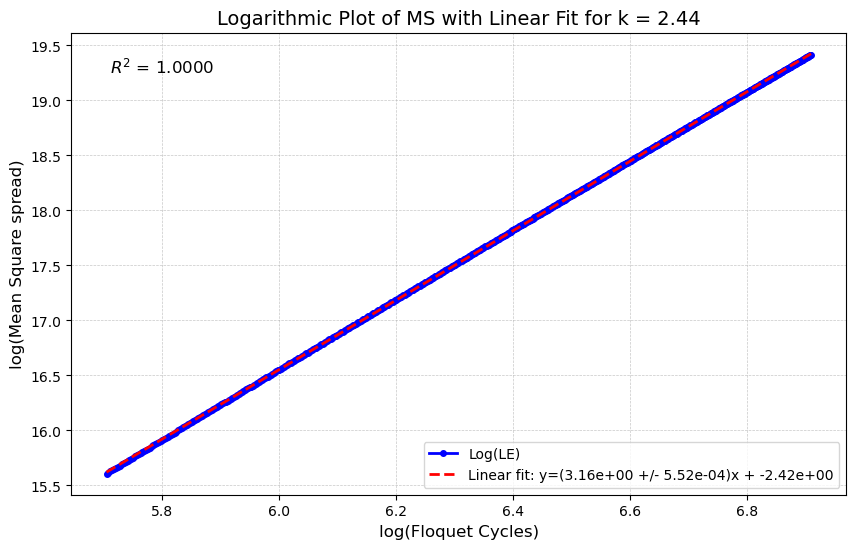

R^2 value of the linear fit: 1.0000
Linear fit parameters (0-150): slope = 3.16e+00, intercept = -2.42e+00


In [66]:
LE_Val = msd_values
LE_Error = standard_error99
LE_Val = msd_values
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.linspace(0, 1001, 1000))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
#LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


dict_keys(['RMS_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b0_large', 'b1_large', 'b2_large', 'b3_large', 'b4_large', 'b5_large', 'b6_large', 'b7_large', 'b8_large', 'b9_large', 'b10_large', 'b11_large', 'b12_large', 'b13_large', 'b14_large', 'b15_large', 'b16_large', 'b17_large', 'b18_large', 'b19_large', 'b20_large', 'b21_large', 'b22_large', 'b23_large', 'b24_large', 'b25_large', 'b26_large', 'b27_large', 'b28_large', 'b29_large', 'b30_large', 'b31_large', 'b32_large', 'b33_large', 'b34_large', 'b35_large', 'b36_large', 'b37_large', 'b38_large', 'b39_large', 'b40_large', 'b41_large', 'b42_large', 'b43_large', 'b44_large', 'b45_large', 'b46_large', 'b47_large', 'b48_large', 'b49_large', 'b50_large', 'b51_large', 'b52_large', 'b53_large', 'b54_large', 'b55_large', 'b56_large', 'b57_large', 'b58_large', 'b59_large', 'b60_large', 'b61_large', 'b62_large', 'b63_large', 'b64_large', 'b65_large', 'b66_large', 'b67_large', 'b68_large', 'b69_large', 'b70_large', 'b71_large', 'b72_l

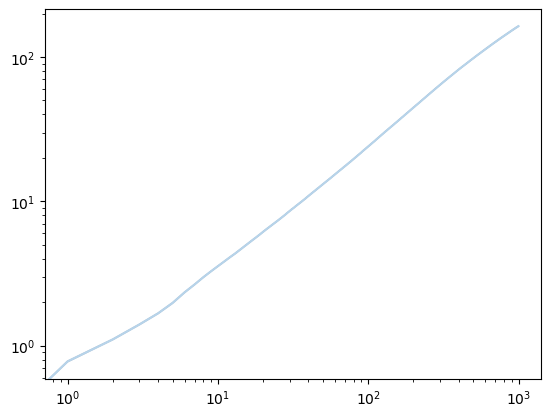

In [35]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 88
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'RMS_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(len(array99)), array99, label='array99', color=colors[0])
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])


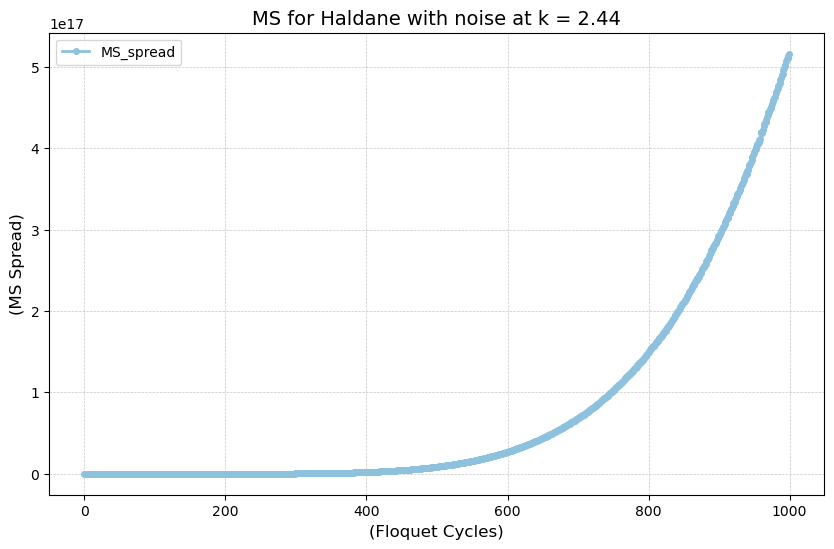

In [38]:
plt.figure(figsize=(10, 6))
array99 = array99**2  # Square the array for RMS
# Plot the curve with enhanced styling
plt.plot(np.arange(len(array99)), array99, label="MS_spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('MS for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('(Floquet Cycles)', fontsize=12)
plt.ylabel('(MS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

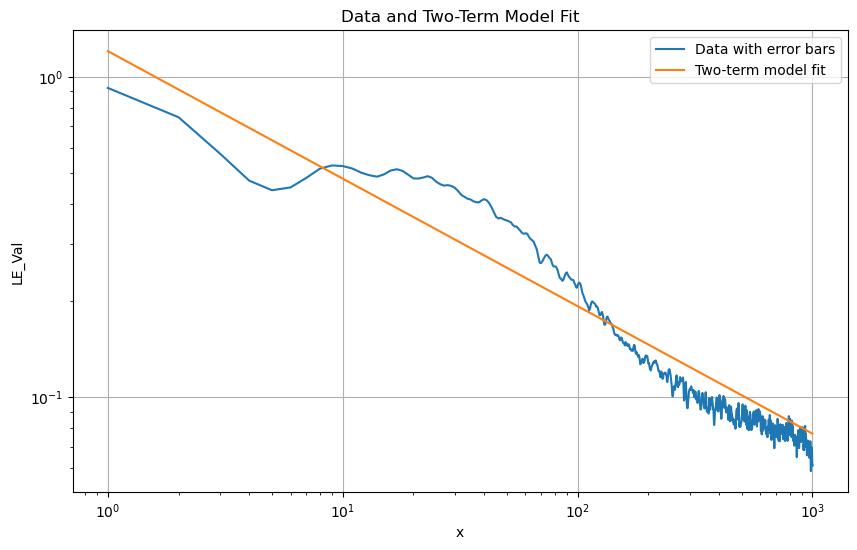

Fitted parameters:
  t = 76.000000 ± 0.000000
  n = 1.200000 ± 0.000000
  a = 0.398009 ± 0.003577
  b = 1.200957 ± 0.019597


In [156]:
import numpy as np
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 6))
# load and flatten
x = np.arange(len(array99))
y = array99
y_err = standard_error99  # Optional, if you have error data

# drop x ≤ 0
mask = x > 0
x, y, y_err = x[mask], y[mask], y_err[mask]

mask = (x >= 0) & (x <= 1000)
x_fit_range = x[mask]
y_fit_range = y[mask]

# floor any zero errors
eps = np.median(y_err[y_err>0]) * 1e-3
y_err = np.where(y_err>0, y_err, eps)

# model definition
def two_term_model(x, t, n, a, b):
    return n*np.exp(-x*t) + b*x**(-a)

# initial guess and bounds
p0 = [76.0, 1.2, 0.396, 0.4]
bounds = ([1e-8, 0.0, 0.0, 0.0], [np.inf, np.inf, np.inf, np.inf])

# now call curve_fit
popt, pcov = curve_fit(
    two_term_model, x_fit_range, y_fit_range,
    p0=p0, bounds=bounds)

# Generate smooth curve for the fitted model
x_fit = np.linspace(np.min(x), np.max(x), 300)
y_fit = two_term_model(x_fit, *popt)

# Plot data with error bars and fitted curve
plt.loglog(x, y, label='Data with error bars')
plt.loglog(x_fit, y_fit, label='Two-term model fit')
plt.xlabel('x')
plt.ylabel('LE_Val')
plt.title('Data and Two-Term Model Fit')
plt.legend()
plt.grid(True)
plt.show()
t_fit, n_fit, a_fit, b_fit = popt
t_err, n_err, a_err, b_err= np.sqrt(np.diag(pcov))
print(f"Fitted parameters:")
print(f"  t = {t_fit:.6f} ± {t_err:.6f}")
print(f"  n = {n_fit:.6f} ± {n_err:.6f}")
print(f"  a = {a_fit:.6f} ± {a_err:.6f}")
print(f"  b = {b_fit:.6f} ± {b_err:.6f}")

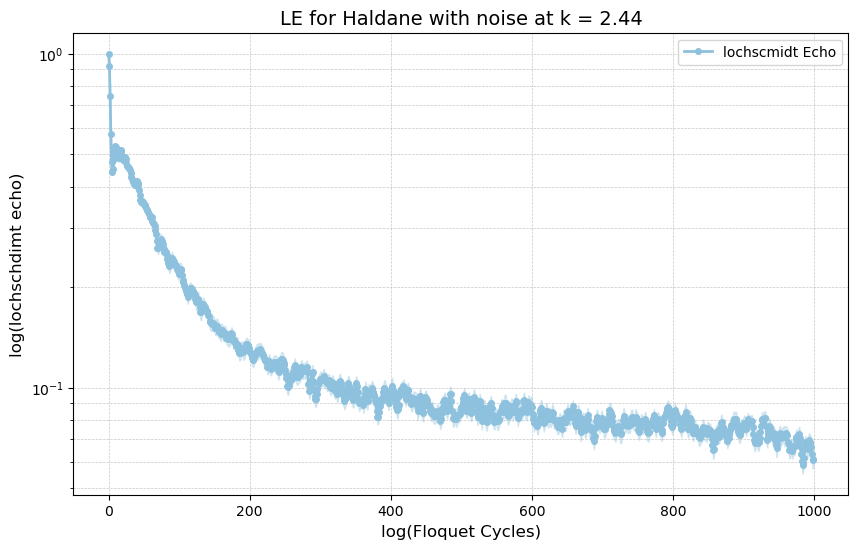

In [113]:
plt.figure(figsize=(10, 6))
#colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
# Plot the curve with enhanced styling
plt.semilogy(np.arange(len(array99)), array99, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
#colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array99)), array99, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/3851983135.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


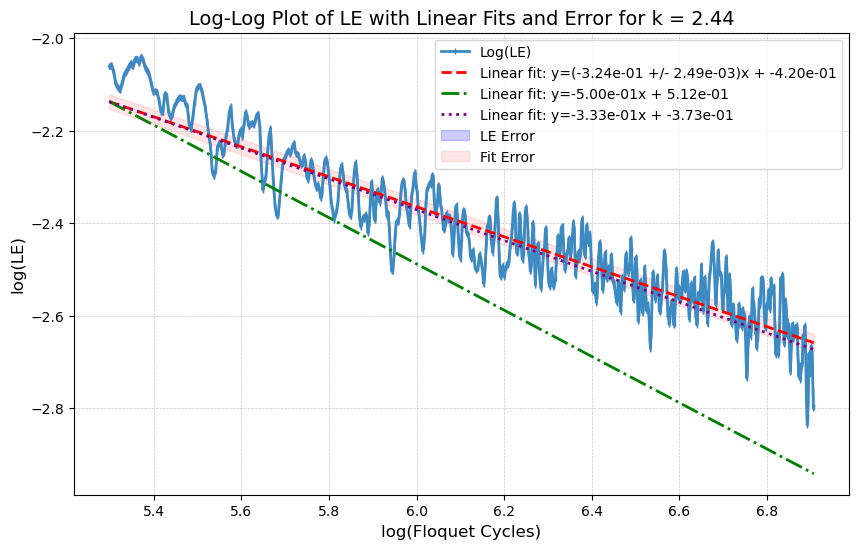

R^2 value of the linear fit: 0.8767
Linear fit parameters (0-150): slope = -3.24e-01, intercept = -4.20e-01


In [116]:
from scipy.optimize import curve_fit
LE_Val = array99
LE_Error = standard_error99
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
LE_Error_plot = LE_Error[200:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[1, 1])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

y_upper = (slope_150 + slope_error_150) * x_log_plot + (intercept_150 + intercept_150_error)
y_lower = (slope_150 - slope_error_150) * x_log_plot + (intercept_150 - intercept_150_error)

# Plot the full log(LE) curve
plt.figure(figsize=(10, 6))

# Plot the full log(LE) curve with enhanced styling
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color=colors[3], linewidth=2, marker='|', markersize=4)
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot,alpha=0.3, color=colors[6])
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}', color='green', linestyle='-.', linewidth=2)
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}', color='purple', linestyle=':', linewidth=2)

# Plot the LE_Error as a shaded region
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot, color='blue', alpha=0.2, label='LE Error')
plt.fill_between(x_log_plot, y_lower, y_upper, color='red', alpha=0.1, label='Fit Error')

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Log-Log Plot of LE with Linear Fits and Error for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(LE)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add R^2 value as text on the plot
#plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")
np.save('LE_Val_plot.npy', LE_Val_plot)
np.save('x_log_plot.npy', x_log_plot)
np.save('LE_Error_plot.npy', LE_Error_plot)
# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/2367923982.py:4: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


Original slope uncertainty: 0.000387
Scaled slope uncertainty:   0.004810
Original intercept uncertainty: 0.002492
Scaled intercept uncertainty:   0.030927
Reduced chi-squared: 154.07 (χ²/dof = 122945.8/798)


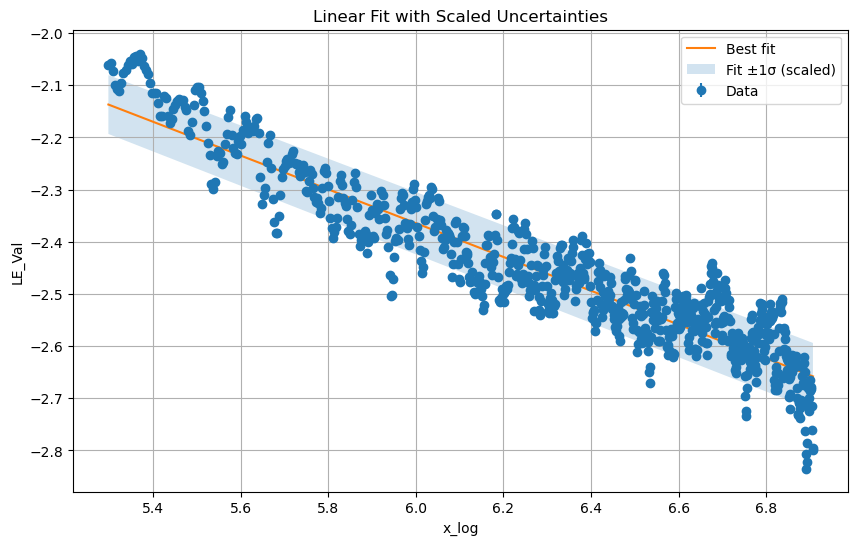

Slope range:     [-0.328844, -0.319224]
Intercept range: [-0.451191, -0.389337]


In [134]:
LE_Val = array99
LE_Error = standard_error99
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x = x_log[200:]
y = LE_Val_log[200:]
y_err = LE_Error[200:]
n = len(LE_Val_plot)

plt.figure(figsize=(10, 6))

def linear_model(x, a, b):
    return a * x + b

# Perform the weighted linear fit
popt, pcov = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
slope, intercept = popt

# Calculate chi-squared and reduced chi-squared
residuals = (y - linear_model(x, slope, intercept))
chi2 = np.sum((residuals / y_err) ** 2)
dof = len(x) - 2  # two fit parameters
chi2_red = chi2 / dof

# Scale covariance matrix if chi2_red > 1
cov_scaled = pcov * chi2_red
slope_err_scaled, intercept_err_scaled = np.sqrt(np.diag(cov_scaled))

# Print original and scaled uncertainties
print(f"Original slope uncertainty: {np.sqrt(pcov[0,0]):.6f}")
print(f"Scaled slope uncertainty:   {slope_err_scaled:.6f}")
print(f"Original intercept uncertainty: {np.sqrt(pcov[1,1]):.6f}")
print(f"Scaled intercept uncertainty:   {intercept_err_scaled:.6f}")
print(f"Reduced chi-squared: {chi2_red:.2f} (χ²/dof = {chi2:.1f}/{dof})")

# Plot with scaled uncertainty bands
plt.errorbar(x, y, yerr=y_err, fmt='o', label='Data')
x_fit = np.linspace(np.min(x), np.max(x), 100)
y_fit = linear_model(x_fit, slope, intercept)
plt.plot(x_fit, y_fit, label='Best fit')
plt.fill_between(
    x_fit,
    linear_model(x_fit, slope - slope_err_scaled, intercept - intercept_err_scaled),
    linear_model(x_fit, slope + slope_err_scaled, intercept + intercept_err_scaled),
    alpha=0.2,
    label='Fit ±1σ (scaled)'
)
plt.xlabel('x_log')
plt.ylabel('LE_Val')
plt.legend()
plt.title('Linear Fit with Scaled Uncertainties')
plt.grid(True)
plt.show()

slope_min = slope - slope_err_scaled
slope_max = slope + slope_err_scaled
intercept_min = intercept - intercept_err_scaled
intercept_max = intercept + intercept_err_scaled

print(f"Slope range:     [{slope_min:.6f}, {slope_max:.6f}]")
print(f"Intercept range: [{intercept_min:.6f}, {intercept_max:.6f}]")

dict_keys(['RMS_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b0_large', 'b1_large', 'b2_large', 'b3_large', 'b4_large', 'b5_large', 'b6_large', 'b7_large', 'b8_large', 'b9_large', 'b10_large', 'b11_large', 'b12_large', 'b13_large', 'b14_large', 'b15_large', 'b16_large', 'b17_large', 'b18_large', 'b19_large', 'b20_large', 'b21_large', 'b22_large', 'b23_large', 'b24_large', 'b25_large', 'b26_large', 'b27_large', 'b28_large', 'b29_large', 'b30_large', 'b31_large', 'b32_large', 'b33_large', 'b34_large', 'b35_large', 'b36_large', 'b37_large', 'b38_large', 'b39_large', 'b40_large', 'b41_large', 'b42_large', 'b43_large', 'b44_large', 'b45_large', 'b46_large', 'b47_large', 'b48_large', 'b49_large', 'b50_large', 'b51_large', 'b52_large', 'b53_large', 'b54_large', 'b55_large', 'b56_large', 'b57_large', 'b58_large', 'b59_large', 'b60_large', 'b61_large', 'b62_large', 'b63_large', 'b64_large', 'b65_large', 'b66_large', 'b67_large', 'b68_large', 'b69_large', 'b70_large', 'b71_large', 'b72_l

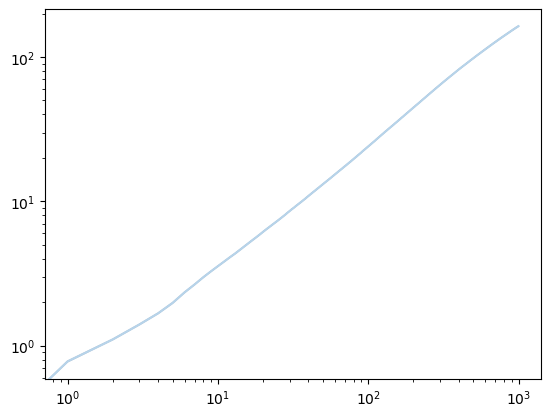

In [89]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 88
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'RMS_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(len(array99)), array99, label='array99', color=colors[0])
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])


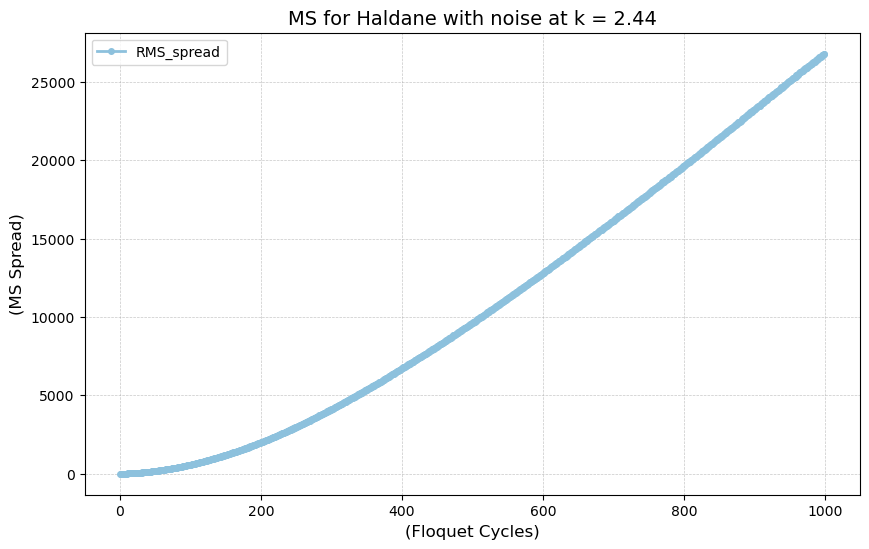

In [90]:
plt.figure(figsize=(10, 6))
array99 = array99**2  # Square the array for RMS
# Plot the curve with enhanced styling
plt.plot(np.arange(len(array99)), array99, label="RMS_spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('MS for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('(Floquet Cycles)', fontsize=12)
plt.ylabel('(MS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_13809/4192099663.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_13809/4192099663.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


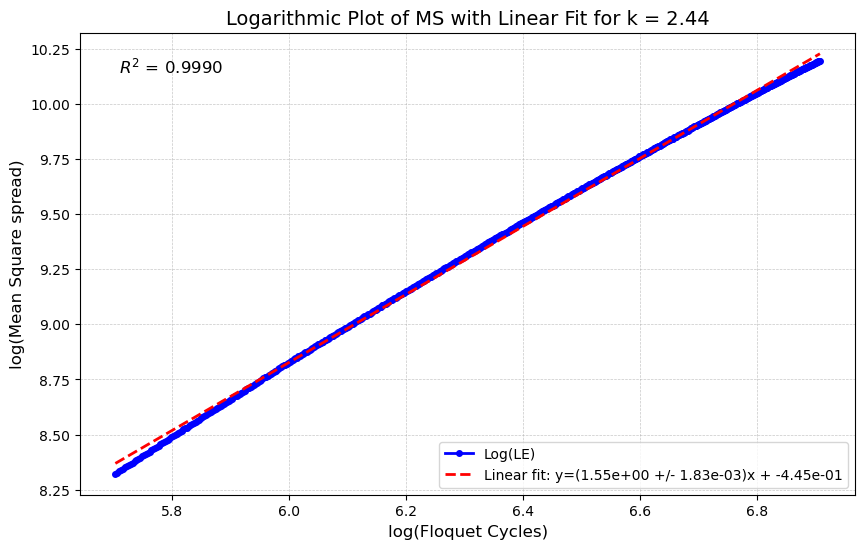

R^2 value of the linear fit: 0.9990
Linear fit parameters (0-150): slope = 1.55e+00, intercept = -4.45e-01


In [94]:
LE_Val = array99
LE_Error = standard_error99
LE_Val = array99
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


dict_keys(['LE_AFI_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b0_large', 'b1_large', 'b2_large', 'b3_large', 'b4_large', 'b5_large', 'b6_large', 'b7_large', 'b8_large', 'b9_large', 'b10_large', 'b11_large', 'b12_large', 'b13_large', 'b14_large', 'b15_large', 'b16_large', 'b17_large', 'b18_large', 'b19_large', 'b20_large', 'b21_large', 'b22_large', 'b23_large', 'b24_large', 'b25_large', 'b26_large', 'b27_large', 'b28_large', 'b29_large', 'b30_large', 'b31_large', 'b32_large', 'b33_large', 'b34_large', 'b35_large', 'b36_large', 'b37_large', 'b38_large', 'b39_large', 'b40_large', 'b41_large', 'b42_large', 'b43_large', 'b44_large', 'b45_large', 'b46_large', 'b47_large', 'b48_large', 'b49_large', 'b50_large', 'b51_large', 'b52_large', 'b53_large', 'b54_large', 'b55_large', 'b56_large', 'b57_large', 'b58_large', 'b59_large', 'b60_large', 'b61_large', 'b62_large', 'b63_large', 'b64_large', 'b65_large', 'b66_large', 'b67_large', 'b68_large', 'b69_large', 'b70_large', 'b71_large', 'b72_la

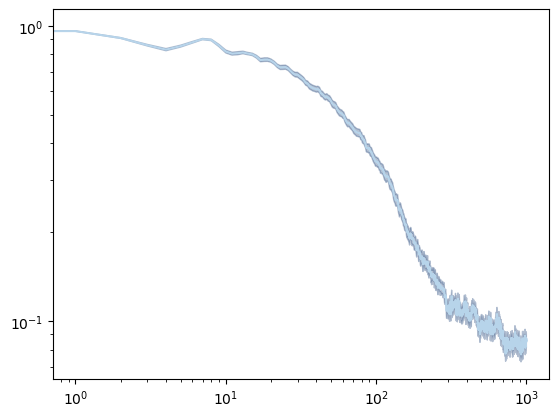

In [73]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/OPtimization_check_AFI')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 88
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'LE_AFI_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'LE_AFI_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(len(array99)), array99, label='array99', color=colors[0])
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[6])


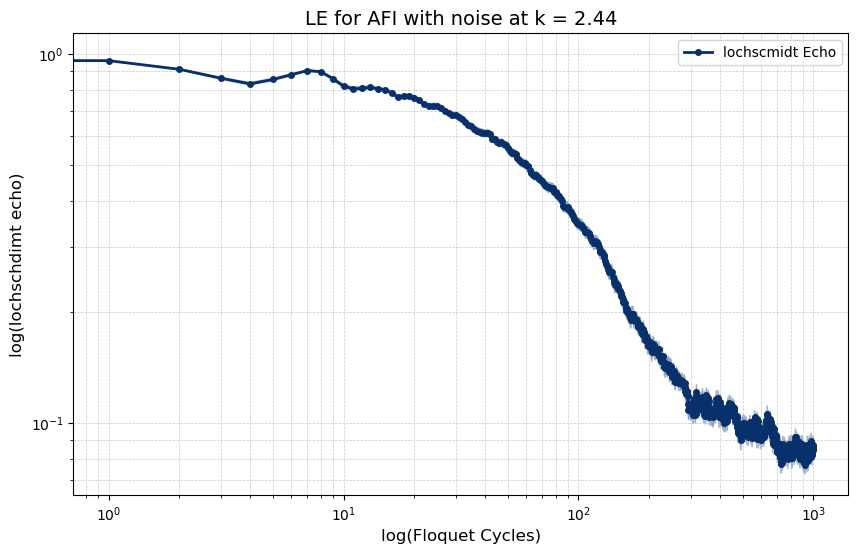

In [74]:
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array99)), array99, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for AFI with noise at k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_6978/3706931913.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


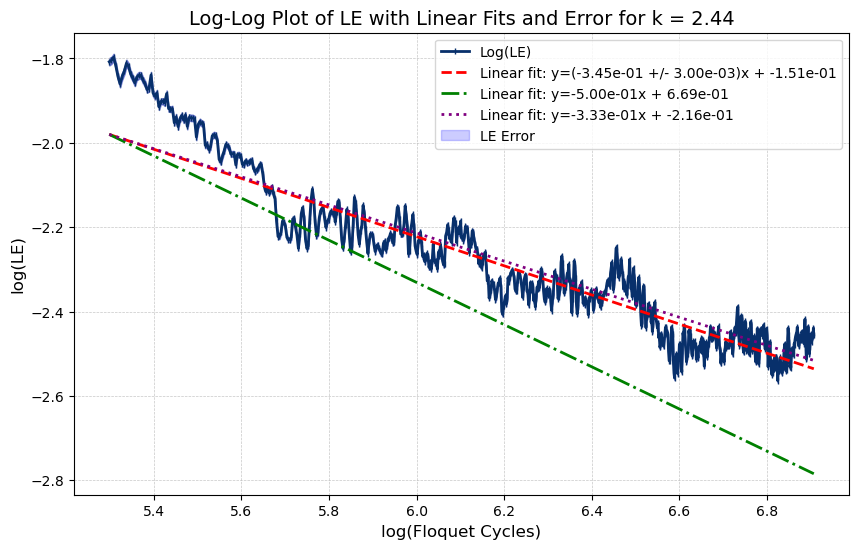

R^2 value of the linear fit: 0.8900
Linear fit parameters (0-150): slope = -3.45e-01, intercept = -1.51e-01


In [78]:
from scipy.optimize import curve_fit
LE_Val = array99
LE_Error = standard_error99
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[200:]
LE_Val_plot = LE_Val_log[200:]
LE_Error_plot = LE_Error[200:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')
colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[1, 1])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = -0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = -0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)



# Plot the full log(LE) curve
plt.figure(figsize=(10, 6))

# Plot the full log(LE) curve with enhanced styling
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color=colors[1], linewidth=2, marker='|', markersize=4)
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot,alpha=0.3, color=colors[1])
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}', color='green', linestyle='-.', linewidth=2)
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}', color='purple', linestyle=':', linewidth=2)

# Plot the LE_Error as a shaded region
plt.fill_between(x_log_plot, LE_Val_plot - LE_Error_plot, LE_Val_plot + LE_Error_plot, color='blue', alpha=0.2, label='LE Error')

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Log-Log Plot of LE with Linear Fits and Error for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(LE)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add R^2 value as text on the plot
#plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
